In [1]:
import glob, os, sys, inspect
import pandas as pd
import shutil
import matplotlib.pyplot as plt
import numpy as np
import math
import cv2
import plotly.express as px

In [7]:
# Custom modules
sys.path.append('../../NanoscoPy/')
from nanoscopy import spm
from nanoscopy.utilities import dialog_askfilename, dialog_askdirectory 

In [9]:
path =dialog_askfilename()

In [16]:
data = pd.read_excel(path)
data.head()

,Frequency (Hz),Bud Box Closed Unscaled (dB),Bud Box Open Unscaled (dB),Bud Box Closed (dB),Bud Box Open (dB)
0,0.00000,20.6103,20.6103,67.6,67.6
1,2.46607,17.4103,17.4103,64.4,64.4
2,4.93213,-46.9897,-46.9897,0.0,0.0
3,7.39820,-46.9897,-46.9897,0.0,0.0
4,9.86427,-46.9897,-46.9897,0.0,0.0


In [22]:
df = data['Frequency (Hz)'].at[1] - data['Frequency (Hz)'].at[0]
df

2.46607

In [73]:
psd_closed = (data['Bud Box Closed (dB)']**2)/(2.0*df)
psd_open = (data['Bud Box Open (dB)']**2)/(2.0*df)
psd_open

0       926.526822
1       840.884484
2         0.000000
3         0.000000
4         0.000000
           ...    
1019      0.000000
1020      0.000000
1021      0.000000
1022      0.000000
1023      0.000000
Name: Bud Box Open (dB), Length: 1024, dtype: float64

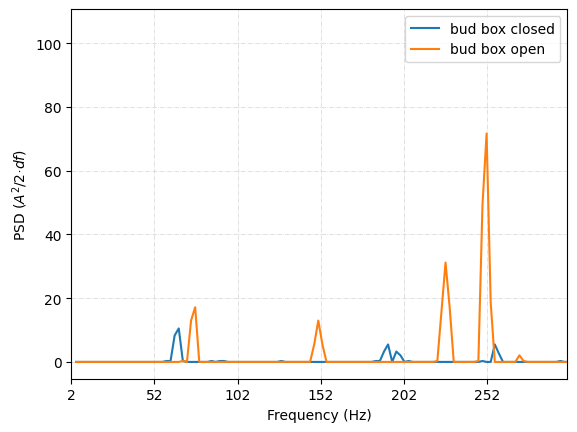

In [94]:
i = 2
x = data['Frequency (Hz)'][i::]
y1 = psd_closed[i::]
y2 = psd_open[i::]
xmin = 2
xmax = 300
tick_range = np.arange(xmin, xmax, 50.0)
plt.plot(x, y1, label='bud box closed')
plt.plot(x, y2, label='bud box open')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD ($A^2 / 2 \dot df$)')
# plt.yscale('log')
plt.xlim(xmin,xmax)
# plt.ylim(-1,100)
plt.xticks(tick_range)
plt.grid(color='lightgrey', linestyle='-.', linewidth=0.5)
plt.legend()
plt.show()